<h1 align="center">MLP LAB</h1>

##Install PyTorch + Imports

##Dataset

In [0]:
import numpy as np
import pandas as pd
from IPython.core.debugger import set_trace

In [7]:
import platform
import io

import matplotlib.pyplot as plt
from google.colab import files
from matplotlib.pyplot import cm 

def install_pytorch():
    os = platform.system()
    if os == "Linux":
        !pip3 install http://download.pytorch.org/whl/cu90/torch-0.4.0-cp36-cp36m-linux_x86_64.whl
    elif os == "Windows":
        !pip3 install http://download.pytorch.org/whl/cu90/torch-0.4.0-cp36-cp36m-win_amd64.whl 
    !pip3 install torchvision


# Install PyTorch
install_pytorch()


import torch
import torch.nn as nn
import torch.optim as optim
import torchvision

In [0]:
import torchvision.datasets as dset
import torchvision.transforms as transforms

training_data = dset.MNIST(root='../data', transform = transforms.ToTensor(),train = True, download = True)
testing_data = dset.MNIST(root='../data', transform = transforms.ToTensor(),train = False, download = True)

**Split Training and Test Data**

In [0]:
from sklearn.model_selection import train_test_split
#train, test = train_test_split(testing_data, test_size = 0.20)

batch_size = 100
train_loader = torch.utils.data.DataLoader(dataset = training_data,
                                           batch_size = batch_size,
                                           shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = testing_data,
                                          batch_size = batch_size,
                                          shuffle = False)
#len(train)
#len(test)

In [10]:
d = list(training_data)
d[0][0].shape

torch.Size([1, 28, 28])

In [11]:
# Get Rid of One Dimension via Squeeze

image = d[0][0].squeeze()
image.shape

torch.Size([28, 28])

Target: 5


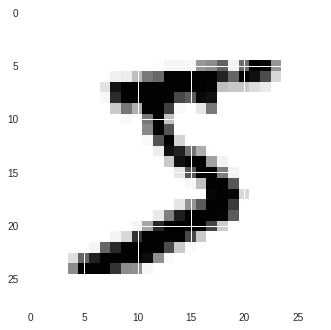

In [12]:
# Get a Target
target = d[0][1] #d[1][1] works as well. 
print('Target: {}'.format(target))

plt.imshow(image)
plt.show()

##Neutral Network

In [13]:
# Create Model and Test Model
import torch.nn as nn
import torch.nn.functional as F
input_size = 784
hidden_size = 500
num_classes = 10

# Write the code to define your neural net below. Don't forget the hyperparameters
# like the hidden state sizes for the input layer, hidden layers and output layer
class MLP(nn.Module):
    def __init__(self,input_size, hidden_size, num_classes):
       super(MLP, self).__init__()
       self.fc1 = nn.Linear(input_size,hidden_size)
       self.fc2 = nn.Linear(hidden_size,hidden_size)
       self.fc3 = nn.Linear(hidden_size,num_classes)
    
    def forward(self, x):        
        # your forward pass code
        # You will use the Linear/Conv2D classes declared in the constructor
        # and use the functional nonlinear functions as activations, such as F.relu
        out = F.relu(self.fc1(x))
        out = F.relu(self.fc2(out))
        # The last layer activation function depends on your loss function and task
        out = self.fc3(out)
        return out

model = MLP(input_size,hidden_size,num_classes)
     
# Print a summary of your model. Everything looks right?
print(model)
print("# parametre: ", sum([param.nelement() for param in model.parameters()]))

MLP(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=10, bias=True)
)
# parametre:  648010


##Loss and Optimizer
What loss function will you use? Since you are doing caetegorical classification, what is an appropriate loss function that we saw in class? 

Hint: check the PyTorch [loss functions docs](https://pytorch.org/docs/master/nn.html?highlight=loss#loss-functions), of course! And while you're at it, grab an [appropriate optimizer](https://pytorch.org/docs/stable/optim.html?highlight=optim#torch.optim.SGD)

In [0]:
criterion = nn.CrossEntropyLoss() # your loss function
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-3) # your optimizer, choose one of PyTorch's optimizer

## Train/Evaluate Model

In this cell you will write a function which loops your dataset for the max number of epochs and trains the model. At the end of each epoch, evaluate the model and save the results!

In [15]:
total_loss = []
#epochs = 20

num_epochs = 10

# Start training
for epoch in range(num_epochs):
    
    model.train()
    n_iter = 0
    train_loss = 0
    
    for images, labels in train_loader:
      #global_step += 1
      
      # Flatten the images
      images = images.view(-1, 28*28)
      
      # Zero the gradient buffer + Restart your gradients, Flush the gradiant.
      optimizer.zero_grad()  
      
      # Your code where you use `model` to predict the labels -> Forward
      output = model(images)
      
      # Measure the loss compared to the true target
      loss_train = criterion(output, labels)
      total_loss.append(train_loss)
      #losses_train.append((global_step, train_loss))
     
    
      # Backward
      loss_train.backward() #Looks at the history.
      
      # Update your model with the optimizer!
      optimizer.step() 
    
      
      # Statistics
      train_loss += loss_train.data[0]
      n_iter += 1
    
    print('Epoch: {}/{}, Loss: {:.4f}'.format(
          epoch+1, num_epochs, train_loss/n_iter))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch: 1/10, Loss: 2.2894
Epoch: 2/10, Loss: 2.2600
Epoch: 3/10, Loss: 2.2232
Epoch: 4/10, Loss: 2.1728
Epoch: 5/10, Loss: 2.1010
Epoch: 6/10, Loss: 1.9984
Epoch: 7/10, Loss: 1.8569
Epoch: 8/10, Loss: 1.6749
Epoch: 9/10, Loss: 1.4674
Epoch: 10/10, Loss: 1.2649


## Show the results of training

In [16]:
# Set model to evaluate mode
model.eval()

correct = 0
total = 0

# Iterate over data.
for images, labels in test_loader:  
      
    # Flatten the images
    images = images.view(-1, 28*28)
    
    # Forward
    outputs = model(images)
    loss = criterion(outputs, labels)  
    _, predicted = torch.max(outputs.data, 1)
    
    # Statistics
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy on the test set: {}%'.format(100 * correct / total))



Accuracy on the test set: 78%


##Plotting

In [25]:
len(total_loss)

6000

ValueError: ignored

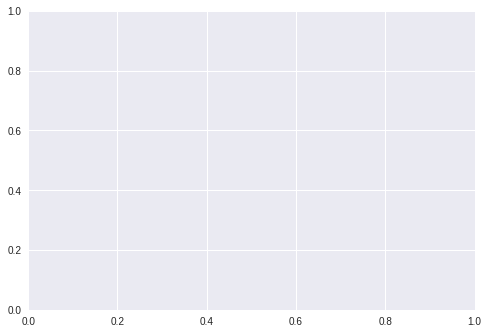

In [26]:
x = list(range(len(total_loss)))

ax = plt.subplot(111)
plt.plot(x, train_loss, 'r', label="Train")
plt.plot(x, total_loss, 'g', label="Validation")
plt.title('Accuracy')
leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=False, fancybox=False)
leg.get_frame().set_alpha(0.99)